In [559]:
# Import Init List
import graphviz
from matplotlib import pyplot as plt
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from math import log
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
import statsmodels.api as sm
import pandas as pd
import numpy as np

#Pyplot设置
plt.rcParams['font.sans-serif']=['DejaVu Sans']  # 中文支持
plt.rcParams['axes.unicode_minus']=False

# 实验1

## 线性回归模型试验

### 设计算法，建立线性回归模型

首先对给出数据进行图形化。使用`pyplot`渲染散点图

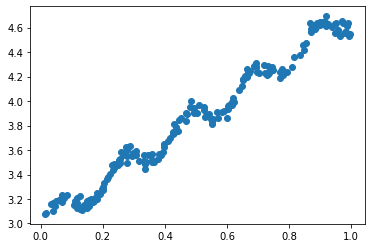

In [560]:
# 导入数据
line_data = pd.read_csv('line-ext.csv')
# 设置图表
plt.scatter(line_data['YearsExperience'], line_data['Salary'])
plt.show()

通过散点图可以发现，数据呈现线性增长趋势。数据集中为一元参数，因此使用简单线性回归模型进行模型创建。
由线性回归公式$f(x)=bx+a$，需要求解斜率$b$和截距$a$的值。两个参数求解公式：
$$
\begin{align*}
b &= \frac{n\sum_{i=1}^{n}x_iy_i-\sum_{i=1}^{n}x_i\sum_{i=1}^{n}y_i}{n\sum_{i=1}^{n}x_i^2-(\sum_{i=1}^{n}x_i)^2}\\
a &= \bar y - b\bar x
\end{align*}
$$

In [561]:
# 样本数量
line_data_num = line_data.shape[0]
# 参数和计算
sum_x = line_data.YearsExperience.sum()
sum_y = line_data.Salary.sum()
sum_x_2 = line_data.YearsExperience.pow(2).sum()
xy = line_data.YearsExperience * line_data.Salary
sum_xy = xy.sum()
# 根据公式计算回归模型的参数
b = (sum_xy - sum_x * sum_y / line_data_num) / (sum_x_2 - sum_x **2 / line_data_num)
a = line_data.Salary.mean() - b * line_data.YearsExperience.mean()

print('斜率b：',b,'\n截距a：',a)
print('模型表达式：y =',b,'x +',a)

斜率b： 1.6953226421712224 
截距a： 3.0077432426975887
模型表达式：y = 1.6953226421712224 x + 3.0077432426975887


散点图绘制以及输出均方误差$MSE$如下所示。

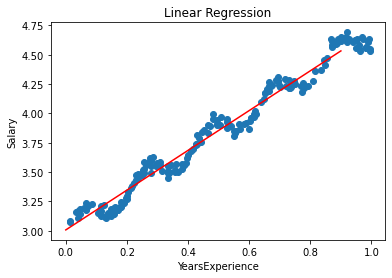

In [562]:
plt.scatter(line_data['YearsExperience'], line_data['Salary'])
plt.plot(np.arange(0, 1, 0.1), b * np.arange(0, 1, 0.1) + a, c = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Linear Regression')
plt.show()

In [563]:
# 均方误差
mse_res = []
mse_pre = []
lr_pre_x = []
for index, row in line_data.iterrows():
    mse_pre.append(float(row[1]))
    mse_res.append(float(row[0] * b + a))
    lr_pre_x.append(float(row[0]))
print("均方误差MSE为：", mean_squared_error(mse_res, mse_pre))

均方误差MSE为： 0.006776245408407456


预测值为`x = 0.8452`时，有如下结果：

In [564]:
key_value = 0.8452
m = b * key_value + a
print("计算预测值为：", m)

计算预测值为： 4.440629939860706


### 模型使用

#### sklearn.LinearRegression

使用过程：

1. 导入模块，创建模块对象。
2. 导入数据，向模型声明自变量、因变量。
3. 模型训练。
4. 对模型进行检验。
5. 使用模型进行预测，查看模型训练的参数数据。

In [565]:
# 创建LinearRegression
lr = linear_model.LinearRegression()

# 添加自变量、因变量
lr_x = line_data[['YearsExperience']]
lr_y = line_data[['Salary']]

# 模型训练
lr.fit(lr_x, lr_y)

# 模型检验，输出准确率
print("模型准确率：", lr.score(lr_x, lr_y))

模型准确率： 0.9731300889856915


下面对模型预测回归方程和散点图进行输出

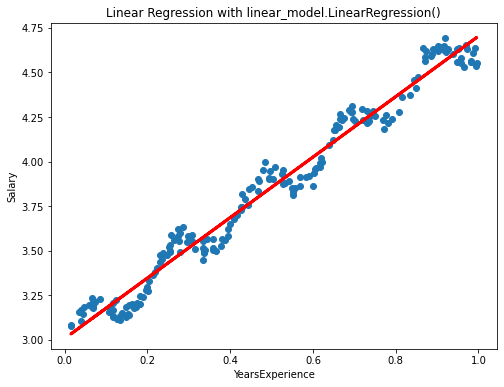

In [566]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line_data.YearsExperience, line_data.Salary, 'o', label='data') # 原始样本
lr_pre = lr.predict(lr_x)   # 预测结果保存
lr_pre_y = []
for i in lr_pre:
    for j in i:
        lr_pre_y.append(float(j))
plt.plot(lr_pre_x, lr_pre_y, color='red', linewidth=3)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Linear Regression with linear_model.LinearRegression()')
plt.show()

对给出待测试自变量进行预测：
可以发现，该模型下预测结果与使用算法进行预测的结果基本一致。

In [567]:
# 模型预测
lr.predict([[key_value]])

/Users/orekimai/.conda/envs/MachineLearning/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[4.44062994]])

#### statsmodels.ols()

使用过程：
1. 导入`statesmodels.ols`模块。
2. 设置自变量、因变量。
3. 创建OLDS实例，设置对应参数。
4. 模型训练。
5. 模型检验预测。

In [568]:
sm_x = line_data['YearsExperience']
sm_y = line_data['Salary']
sm_x = sm.add_constant(sm_x)    # 增加一个常数1，对应回归线在y轴上的截距
sm_regression = sm.OLS(sm_y, sm_x)  # 使用最小二乘法对线性模型进行建模
sm_model = sm_regression.fit()  # 模型训练

# 模型检验与图像显示
prstd, iv_l, iv_u = wls_prediction_std(sm_model)    # 导出模型标准偏差、预测上下界
sm_result = sm_model.predict()  # 使用sm.predict()进行预测，样本数据不填写时为默认样本
print(sm_model.summary())   # 输出模型信息

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     7171.
Date:                Tue, 29 Mar 2022   Prob (F-statistic):          1.80e-157
Time:                        10:17:20   Log-Likelihood:                 215.65
No. Observations:                 200   AIC:                            -427.3
Df Residuals:                     198   BIC:                            -420.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.0077      0.011    2

`sm_model.summary()` 返回了回归分析的摘要。下面对导出数据进行说明：
- `coef`：回归系数，表中对应了预测线性模型的截距与斜率。
- `std err`：标准差，反映样本数据值与回归模型估计值之间的平均差异程度。
- `t`：统计量，回归系数除以标准差，用于对每个回归系数分别进行检验，检验每个自变量对因变量的影响是否显著。

下面对模型预测数据可视化。

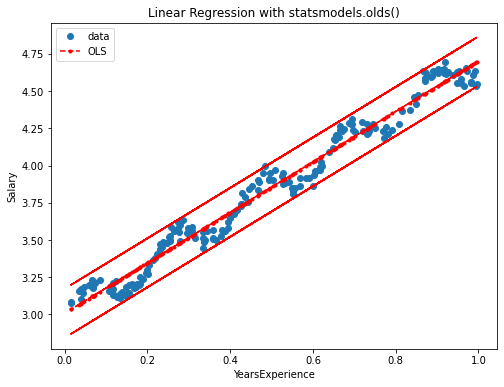

In [569]:
# 图像显示
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(line_data.YearsExperience, line_data.Salary, 'o', label='data') # 原始样本
ax.plot(line_data.YearsExperience, sm_result, 'r--.', label="OLS") # 预测结果
ax.plot(line_data.YearsExperience, iv_u, 'r--') # 预测上界
ax.plot(line_data.YearsExperience, iv_l, 'r--') # 预测下界
ax.legend(loc='best')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Linear Regression with statsmodels.olds()')
plt.show()

对给出待测试自变量进行预测：
可以发现，该模型下预测结果与使用算法进行预测的结果基本一致。

In [570]:
# 结果预测
pd_key = pd.DataFrame([[1.0, key_value]], columns=['const', 'YearsExperience']) # 添加截距项，否则结果有误
sm_pre = sm_model.predict(pd_key)
print("预测结果：\n", sm_pre)

预测结果：
 0    4.44063
dtype: float64


## 决策树算法实验

### 设计算法，建立线性回归模型

决策树模型呈树形结构，在分类问题中，表示基于特征对实例进行分类的过程。它可以认为是`if-then`规则的集合，也可以认为是定义在特征空间与类空间上的条件概率分布。
决策树分为三个步骤：特征选择、决策树生成和剪枝。
首先，需要对数据进行初始化，加入特征信息。
下面的代码中，对文本数据进行转换，使用`DataFrame`形式封装。其中，对于不同特征的取值，使用`sklearn`中的`LabelEncoder`转换成数字表示。
数据转换完成后，划分25%数据作为测试样本`test_data`，75%为训练样本`train_data`。这里使用`DataFrame.sample`选取样本。

#### 数据处理


In [571]:
# 读取文件
data_path = 'glass-lenses.txt'
f = open(data_path)
data_line = f.readlines()

label = ['age', 'prescription', 'astigmatic', 'tearRate']   # 数据标签
data = []   # List结构数据
lenses_target = []  # 样本对应结果List
pd_data = pd.DataFrame(columns=label)   # 创建DataFrame，使用特征量作为列簇头。总样本。

# txt文件流转为List结构
for i in data_line: # 单行分割
    a = i.split()[0:4]  # 前4列数据，左边为闭区间，右边为开区间
    if len(i.split()) == 6:
        a.append(i.split()[4] + ' ' + i.split()[5])
        lenses_target.append(i.split()[4] + ' ' + i.split()[5])
    else:
        a.append(i.split()[4])
        lenses_target.append(i.split()[4])
    data.append(a)


# List结构转为DataFrame结构
for i in range(len(data)):
    pd_data = pd_data.append(pd.DataFrame({'age':data[i][0], 'prescription':data[i][1], 'astigmatic':data[i][2], 'tearRate':data[i][3]}, index=[i]))

le=preprocessing.LabelEncoder() # 将对应特征标签处理为数字化表示（0、1形式）

for col in pd_data.columns: #将dataframe的每一列序列化
    pd_data[col]=le.fit_transform(pd_data[col])


# 划分样本
train_data = pd_data.sample(frac=0.75, random_state=0, axis=0)  # 选取比例、随机种子、选取行
train_target = []   # 对应样本的结果
test_data = pd_data[~pd_data.index.isin(train_data.index)]  # 排除已选样本
test_target = []

# 同步样本结果
for i in train_data.index:
    train_target.append(lenses_target[i])
for i in test_data.index:
    test_target.append(lenses_target[i])



    age  prescription  astigmatic  tearRate
11    0             1           1         0
10    0             1           1         1
22    1             0           1         1
14    0             0           1         1
20    1             0           0         1
1     2             1           0         0
13    0             0           0         0
23    1             0           1         0
16    1             1           0         1
8     0             1           0         1
6     2             0           1         1
17    1             1           0         0
4     2             0           0         1
2     2             1           1         1
5     2             0           0         0
18    1             1           1         1
9     0             1           0         0
7     2             0           1         0


特征取值转换如下：

- age: ['pre': 0, 'presbyopic': 1, 'young': 2]
- prescription: ['hyper': 0, 'myope': 1]
- astigmatic: ['no': 0, 'yes': 1]
- tearRate: ['normal': 0, 'reduced': 1]
- class: ['hard': 0, no lenses': 1, 'soft': 2]

数据处理完成后，开始进行过决策树算法的实现。

#### 信息熵计算


#### 计算特征信息增益

### 模型使用

#### sklearn.DecisionTreeClassifier

根据要求，使用相应工具创建决策树ID3模型。创建决策树时，设置`criterion = 'entropy'`，然后使用`fit`进行训练，将特征值矩阵和分类结果作为参数传入，得到决策树分类器。

In [572]:
# 创建决策树，设置参数
clf = DecisionTreeClassifier(criterion='entropy')
# 导入训练特征、对应样本结果，对模型进行训练
clf.fit(train_data, train_target)

DecisionTreeClassifier(criterion='entropy')

训练完成后使用测试集对模型进行检验。

In [573]:
# 模型检验，输出混淆矩阵
predictions = clf.predict(test_data)
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

        hard       0.50      0.50      0.50         2
   no lenses       0.67      0.67      0.67         3
        soft       1.00      1.00      1.00         1

    accuracy                           0.67         6
   macro avg       0.72      0.72      0.72         6
weighted avg       0.67      0.67      0.67         6



In [574]:
# 模型正确率
print(accuracy_score(test_target, predictions))

0.6666666666666666


通过混淆矩阵可以发现，
使用Graphviz导出决策树。

In [575]:
# tree_data = tree.export_graphviz(clf, out_file=None)
# graph = graphviz.Source(tree_data)
# graph.view()